📍 Bounding Box: BoundingBox(left=-67.1681944444295, bottom=-10.367916666675994, right=-67.13208333331839, top=-10.331805555564877)
🌐 CRS: EPSG:4326


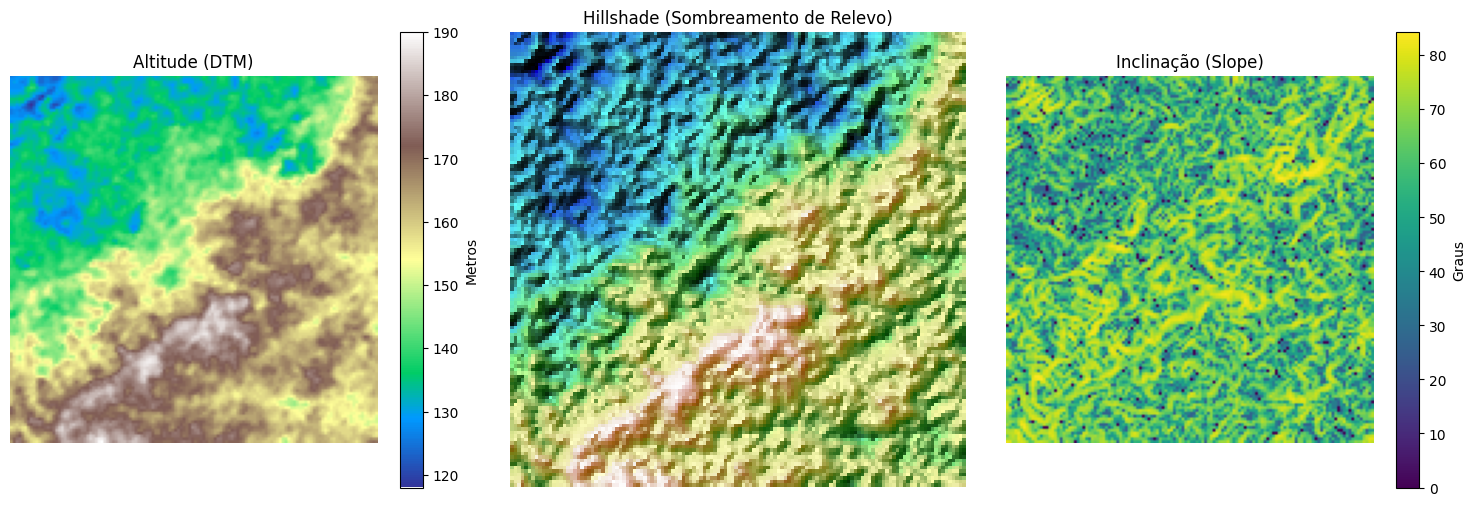

In [2]:
# ⛰️ Visualização DTM (SRTM) com Hillshade e Slope

import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

# Caminho para o DTM cacheado
dtm_path = "../data/raw/lidar/DTM_LATm10.350_LONm67.150.tif"

# Carrega elevação
with rasterio.open(dtm_path) as src:
    elevation = src.read(1)
    bounds = src.bounds
    print("📍 Bounding Box:", bounds)
    print("🌐 CRS:", src.crs)

# Plot 1 - Altitude
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(elevation, cmap="terrain")
plt.title("Altitude (DTM)")
plt.colorbar(label="Metros")
plt.axis("off")

# Plot 2 - Hillshade
ls = LightSource(azdeg=315, altdeg=45)
hillshade = ls.shade(elevation, cmap=plt.cm.gist_earth, vert_exag=1.5)

plt.subplot(1, 3, 2)
plt.imshow(hillshade)
plt.title("Hillshade (Sombreamento de Relevo)")
plt.axis("off")

# Plot 3 - Slope (inclinação)
dy, dx = np.gradient(elevation)
slope = np.rad2deg(np.arctan(np.hypot(dx, dy)))

plt.subplot(1, 3, 3)
plt.imshow(slope, cmap="viridis")
plt.title("Inclinação (Slope)")
plt.colorbar(label="Graus")
plt.axis("off")

plt.tight_layout()
plt.show()
